# Шаг 1: Загрузка данных и первичный анализ

In [2]:

# Importing necessary libraries
import pandas as pd

# Загрузка данных
# Loading dataset into pandas DataFrame
train = pd.read_csv('train.csv')
# Loading dataset into pandas DataFrame
questions = pd.read_csv('questions.csv')
# Loading dataset into pandas DataFrame
lectures = pd.read_csv('lectures.csv')

# Первичный анализ
print("Train Data:")
print(train.head(), train.shape)
print(train.info(), train.isnull().sum())

print("\nQuestions Data:")
print(questions.head(), questions.shape)
print(questions.info(), questions.isnull().sum())

print("\nLectures Data:")
print(lectures.head(), lectures.shape)
print(lectures.info(), lectures.isnull().sum())


Train Data:
   row_id  timestamp  user_id  content_id  content_type_id  task_container_id  \
0       0          0      115        5692                0                  1   
1       1      56943      115        5716                0                  2   
2       2     118363      115         128                0                  0   
3       3     131167      115        7860                0                  3   
4       4     137965      115        7922                0                  4   

   user_answer  answered_correctly  prior_question_elapsed_time  \
0            3                   1                          NaN   
1            2                   1                      37000.0   
2            0                   1                      55000.0   
3            0                   1                      19000.0   
4            1                   1                      11000.0   

  prior_question_had_explanation  
0                            NaN  
1                          F

# Шаг 2: Очистка и предобработка данных

In [4]:

# Обработка пропусков
train['prior_question_elapsed_time'].fillna(train['prior_question_elapsed_time'].median(), inplace=True)
train['prior_question_had_explanation'].fillna(False, inplace=True)

# Объединение с questions.csv
questions = questions.rename(columns={'question_id': 'content_id'})
# Merging datasets
train = train.merge(questions, on='content_id', how='left')

# Объединение с lectures.csv (для контента типа лекций)
lectures = lectures.rename(columns={'lecture_id': 'content_id'})
# Merging datasets
train = train.merge(lectures, on='content_id', how='left', suffixes=('', '_lecture'))

# Убедимся, что дублирующийся столбец "part" устранён
if 'part_lecture' in train.columns:
    train.drop(columns=['part_lecture'], inplace=True)

# Проверка итогового DataFrame
print(train.head())


/var/folders/n5/twq2syy550527g4q5jk2rg7h0000gn/T/ipykernel_87215/1307378636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['prior_question_elapsed_time'].fillna(train['prior_question_elapsed_time'].median(), inplace=True)
/var/folders/n5/twq2syy550527g4q5jk2rg7h0000gn/T/ipykernel_87215/1307378636.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the

   row_id  timestamp  user_id  content_id  content_type_id  task_container_id  \
0       0          0      115        5692                0                  1   
1       1      56943      115        5716                0                  2   
2       2     118363      115         128                0                  0   
3       3     131167      115        7860                0                  3   
4       4     137965      115        7922                0                  4   

   user_answer  answered_correctly  prior_question_elapsed_time  \
0            3                   1                      21000.0   
1            2                   1                      37000.0   
2            0                   1                      55000.0   
3            0                   1                      19000.0   
4            1                   1                      11000.0   

   prior_question_had_explanation  bundle_id  correct_answer  part  \
0                           False     56

# Шаг 3: Исследовательский анализ данных (EDA)

Matplotlib created a temporary cache directory at /var/folders/n5/twq2syy550527g4q5jk2rg7h0000gn/T/matplotlib-nztt0hqn because the default path (/Users/pavelminsky/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


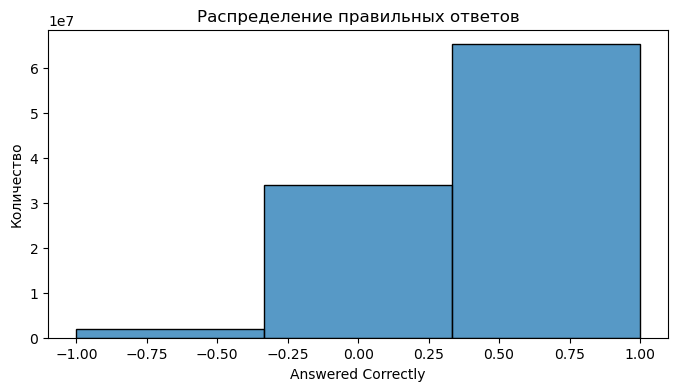

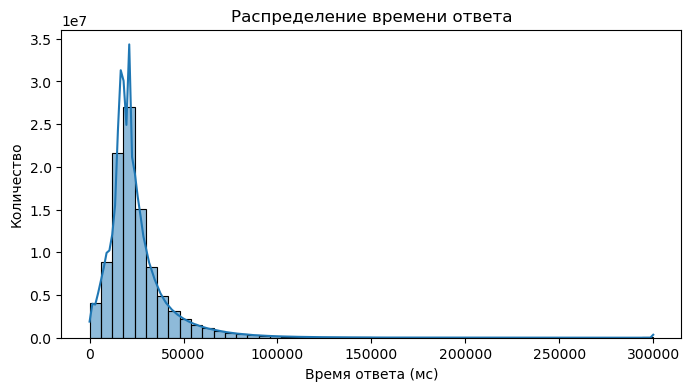

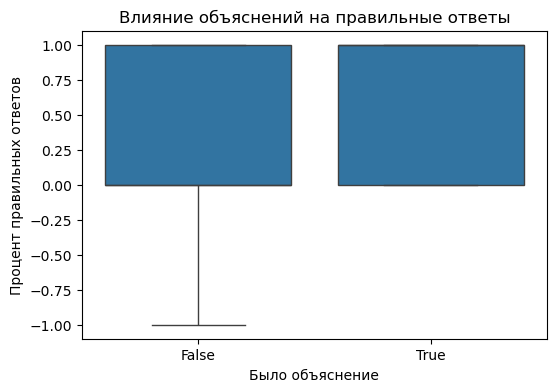

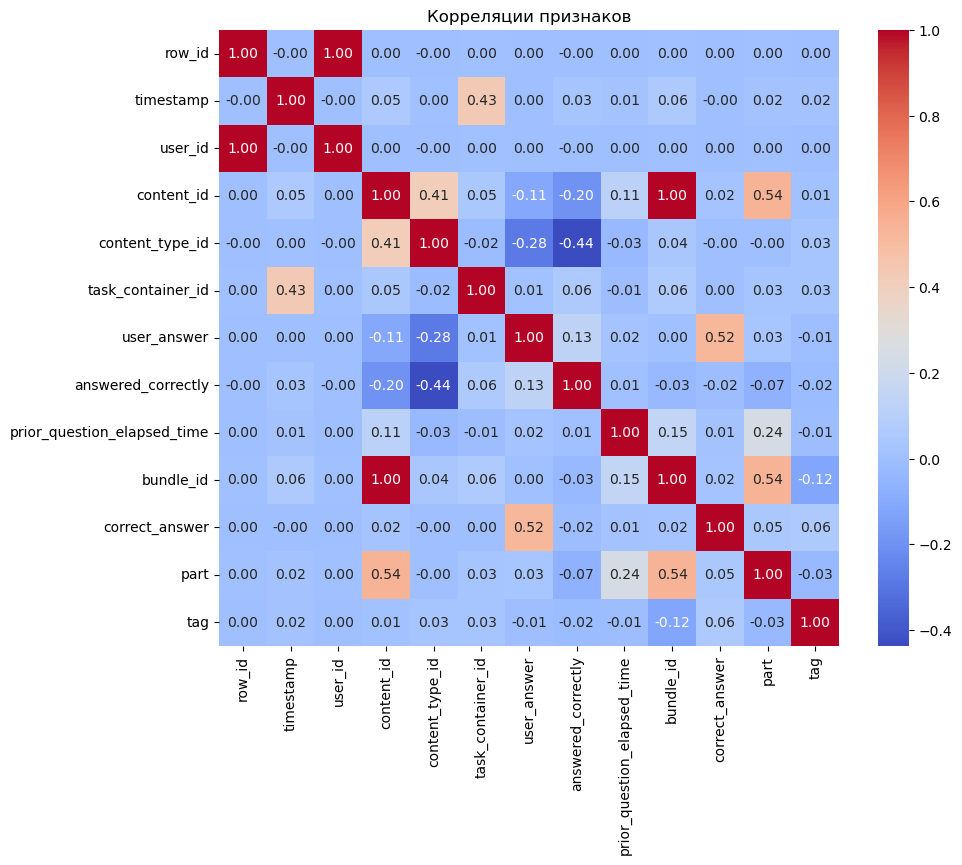

In [6]:
# Importing necessary libraries
import matplotlib.pyplot as plt
# Importing necessary libraries
import seaborn as sns

# Гистограмма правильных ответов
plt.figure(figsize=(8, 4))
# Creating visualizations
sns.histplot(train['answered_correctly'], bins=3, kde=False)
plt.title('Распределение правильных ответов')
plt.xlabel('Answered Correctly')
plt.ylabel('Количество')
plt.show()

# Гистограмма времени ответа
plt.figure(figsize=(8, 4))
# Creating visualizations
sns.histplot(train['prior_question_elapsed_time'], bins=50, kde=True)
plt.title('Распределение времени ответа')
plt.xlabel('Время ответа (мс)')
plt.ylabel('Количество')
plt.show()

# Влияние объяснений на ответы
plt.figure(figsize=(6, 4))
# Creating visualizations
sns.boxplot(x='prior_question_had_explanation', y='answered_correctly', data=train)
plt.title('Влияние объяснений на правильные ответы')
plt.xlabel('Было объяснение')
plt.ylabel('Процент правильных ответов')
plt.show()

# Корреляции признаков
# Вставляем исправление здесь
# Оставляем только числовые столбцы, чтобы избежать ошибок
numeric_columns = train.select_dtypes(include=['number'])

# Корреляционная матрица
correlation_matrix = numeric_columns.corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляции признаков')
plt.show()


# Шаг 4: Выявление ключевых факторов успеха

User Stats:
    user_id  user_correct_ratio
0      115            0.695652
1      124            0.233333
2     2746            0.500000
3     5382            0.632812
4     8623            0.598214
Question Stats:
    content_id  question_correct_ratio
0           0                0.907721
1           1                0.890646
2           2                0.554281
3           3                0.779437
4           4                0.613215
Part Stats:
    part  part_correct_ratio
0   1.0            0.722198
1   2.0            0.701912
2   3.0            0.686321
3   4.0            0.609149
4   5.0            0.598691
5   6.0            0.654881
6   7.0            0.651956
Explanation Stats:
    prior_question_had_explanation  explanation_correct_ratio
0                           False                   0.252089
1                            True                   0.673189


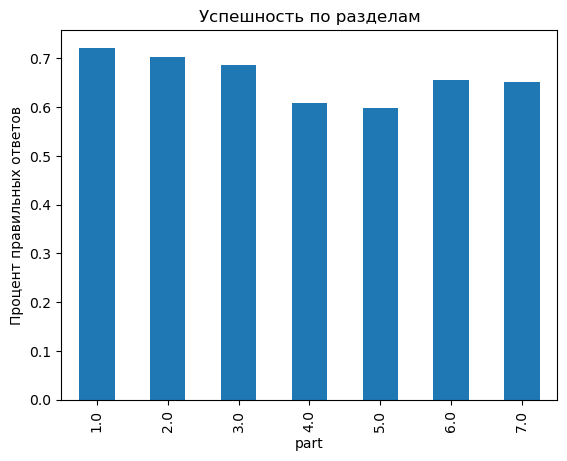

In [8]:

# Средний процент правильных ответов по пользователям
user_stats = train.groupby('user_id')['answered_correctly'].mean().reset_index()
user_stats.rename(columns={'answered_correctly': 'user_correct_ratio'}, inplace=True)

# Средний процент правильных ответов по вопросам
question_stats = train.groupby('content_id')['answered_correctly'].mean().reset_index()
question_stats.rename(columns={'answered_correctly': 'question_correct_ratio'}, inplace=True)

# Средний процент правильных ответов по разделам
part_stats = train.groupby('part')['answered_correctly'].mean().reset_index()
part_stats.rename(columns={'answered_correctly': 'part_correct_ratio'}, inplace=True)

# Влияние объяснений
explanation_stats = train.groupby('prior_question_had_explanation')['answered_correctly'].mean().reset_index()
explanation_stats.rename(columns={'answered_correctly': 'explanation_correct_ratio'}, inplace=True)

# Итоговые результаты
print("User Stats:\n", user_stats.head())
print("Question Stats:\n", question_stats.head())
print("Part Stats:\n", part_stats)
print("Explanation Stats:\n", explanation_stats)

# Визуализация влияния разделов
# Creating visualizations
part_stats.plot(kind='bar', x='part', y='part_correct_ratio', title='Успешность по разделам', legend=False)
plt.ylabel('Процент правильных ответов')
plt.show()


# Шаг 5: Финальный анализ и выводы

Финальный анализ данных:
Средняя успешность студентов: 0.63
Среднее время ответа (мс): 25321.05
Процент ответов с объяснением: 88.60


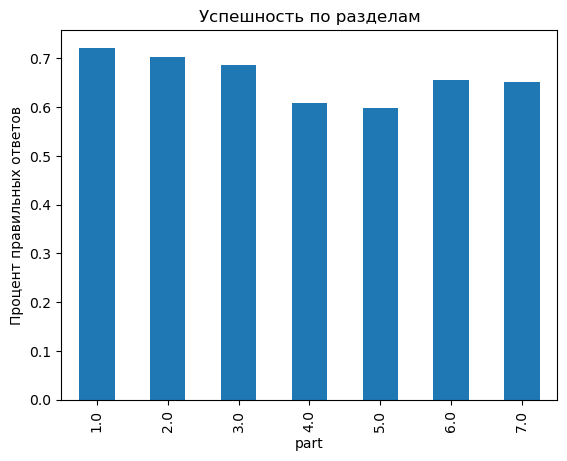

In [10]:

# Финальный отбор признаков
# Importing necessary libraries
important_features = train[['user_id', 'content_id', 'part', 
'prior_question_elapsed_time',
'prior_question_had_explanation',
'answered_correctly']]

# Создание сводной таблицы по важным признакам
summary = {
'Средняя успешность студентов': train['answered_correctly'].mean(),
'Среднее время ответа (мс)': train['prior_question_elapsed_time'].mean(),
'Процент ответов с объяснением': train['prior_question_had_explanation'].mean() * 100
}

# Печать итогов
print("Финальный анализ данных:")
for key, value in summary.items():
    print(f"{key}: {value:.2f}")

# Итоговая визуализация: успешность студентов по разделам
# Importing necessary libraries
import matplotlib.pyplot as plt
# Creating visualizations
part_stats.plot(kind='bar', x='part', y='part_correct_ratio', title='Успешность по разделам', legend=False)
plt.ylabel('Процент правильных ответов')
plt.show()

# Сохранение итоговых данных
# Importing necessary libraries
final_data = important_features.copy()
final_data.to_csv('final_data.csv', index=False)
